[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aoguedao/math685_numerical_analysis/blob/main/assignments/computer-project-01.ipynb)

# MATH685 -Computer Project I

_Alonso Ogueda_

In [1]:
import numpy as np
import pandas as pd

## Question 1

### 1.a

In [2]:
def q01a_method(f, df, x0, x1, tol=1e-8):
    """Question 1-a method

    Parameters
    ----------
    f : function
        Function to evaluate
    df : function
        First derivative of f
    x0 : float
        Initial guess
    x1 : float
        Initial guess
    tol : float, optional
        Tolerance, by default 1e-8

    Returns
    -------
    pd.DataFrame
        Approximations and absolute difference
    """

    h = lambda f, df, x0, x1: (df(x1) * f(x0)) / (f(x0) - f(x1))
    g = lambda f, x0, x1: f(x1) / (x1 - x0)
    output = (
        pd.DataFrame(
            [
                [x0, np.nan],
                [x1, np.nan]
            ],
            columns=["x_k", "abs_difference"]
        )
        .rename_axis("k")
    )
    k = 2
    converge = False
    while not converge:
        delta = f(x1) / (h(f, df, x0, x1) + g(f, x0, x1))
        x = x1 - delta
        output.loc[k] = [x, np.abs(delta)]
        if np.abs(delta) < tol:
            converge = True
        else:
            x0 = x1
            x1 = x
            k += 1
    return output

In [3]:
f_01a = lambda x: x ** 3 + x - 1
df_01a = lambda x: 3 * x ** 2 + 1
x0_01a = 100
x1_01a = 90
tol_01a = 1e-8
q01a_method(f_01a, df_01a, x0_01a, x1_01a, tol_01a)

,x_k,abs_difference
k,,
0,100.000000,NaN
1,90.000000,NaN
2,46.519686,4.348031e+01
3,27.216213,1.930347e+01
4,15.579733,1.163648e+01
5,8.941197,6.638536e+00
6,5.108989,3.832208e+00
7,2.894030,2.214959e+00
8,1.616809,1.277221e+00


In [4]:
# print(
#         q01a_method(f_01a, df_01a, x0_01a, x1_01a, tol_01a).to_latex(
#         header=["$x_k$", "$\abs{x_k - x_{k-1}}$"],
#         na_rep="-",
#         formatters={"x_k": "{:0.10f}".format, "abs_difference": "{:e}".format},
#         escape=False,
#         caption="Root approximations of $f(x)=x^3 + x -1 $ with initial guesses $x_0 = 100$ and $x_1=90$",
#         label="tab:q01a",
#         position="!h"
#     )
# )

### 1.b

In [5]:
def newton_method(f, df, x0, tol=1e-8, iterations=1000):
    """Newton's Method Solver

    It finds a solution to f(x)=0 given an initial guess x0

    Parameters
    ----------
    f : function
        Function to evaluate
    df: function
        Derivate of the function 
    x0: float
        Initial guess
    tol: float, optional
        Tolerance, by default 1e-8
    iteration: int, optional
        Maximum number of iterations

    Returns
    -------
    pd.DataFrame
        Approximations and absolute difference
    """
    output = pd.DataFrame(columns=["x_k", "abs_difference"]).rename_axis("k")
    output.loc[0] = [x0, np.nan]
    
    k = 1
    converge = False
    while (not converge) and (k <= iterations):
        delta =  f(x0) / df(x0)
        x = x0 - delta
        output.loc[k] = [x, np.abs(delta)]
        if np.abs(delta) < tol:
            converge = True
        else:
            x0 = x
        k += 1
    return output

In [6]:
newton_method(f_01a, df_01a, x0_01a, tol_01a)

,x_k,abs_difference
k,,
0,100.000000,NaN
1,66.664478,3.333552e+01
2,44.439727,2.222475e+01
3,29.621654,1.481807e+01
4,19.740650,9.881004e+00
5,13.150040,6.590609e+00
6,8.751751,4.398289e+00
7,5.813552,2.938199e+00
8,3.847616,1.965936e+00


In [7]:
# print(
#         newton_method(f_01a, df_01a, x0_01a, tol_01a).to_latex(
#             header=["$x_k$", "$\abs{x_k - x_{k-1}}$"],
#             na_rep="-",
#             formatters={"x_k": "{:0.10f}".format, "abs_difference": "{:e}".format},
#             escape=False,
#             caption="Root approximations of $f(x)=x^3 + x -1 $ with initial guess $x_0 = 100$ using Newton's Method",
#             label="tab:q01b",
#             position="!h"
#         )
# )

### 1.c

In [8]:
def q01c_method(f, df, x0, x1, r, tol=1e-8):
    """Question 1-c method

    Parameters
    ----------
    f : function
        Function to evaluate
    df : function
        First derivative of f
    x0 : float
        Initial guess
    x1 : float
        Initial guess
    r  : float
        Root
    tol : float, optional
        Tolerance, by default 1e-8

    Returns
    -------
    pd.DataFrame
        Approximations, error and ratio.
    """

    h = lambda f, df, x0, x1: (df(x1) * f(x0)) / (f(x0) - f(x1))
    g = lambda f, x0, x1: f(x1) / (x1 - x0)

    output = (
        pd.DataFrame(
            [
                [x0, np.nan],
                [x1, np.nan]
            ],
            columns=["x_k", "e_k"]
        )
        .rename_axis("k")
    )
    k = 2
    converge = False
    while not converge:
        delta = f(x1) / (h(f, df, x0, x1) + g(f, x0, x1))
        x = x1 - delta
        error = np.abs(x - r)
        output.loc[k] = [x, error]
        if error < tol:
            converge = True
        else:
            x0 = x1
            x1 = x
            k += 1
    
    output = output.assign(ratio_ek=lambda x: x["e_k"] / x["e_k"].shift(1))
    return output

In [9]:
f_01c = lambda x: x + x ** 2 - x ** 2 * np.cos(x) - np.sin(x)
df_01c = lambda x: 1 + 2 * x - 2 * x * np.cos(x) + x ** 2 * np.sin(x) - np.cos(x)
x0_01c = 1
x1_01c = 2
r_01c = 0
tol_01c = 1e-7

q01c_method(f_01c, df_01c, x0_01c, x1_01c, r_01c, tol=tol_01c)

,x_k,e_k,ratio_ek
k,,,
0,1.000000e+00,NaN,NaN
1,2.000000e+00,NaN,NaN
2,8.097670e-01,8.097670e-01,NaN
3,5.474946e-01,5.474946e-01,0.676114
4,3.407470e-01,3.407470e-01,0.622375
5,2.118389e-01,2.118389e-01,0.621690
6,1.290940e-01,1.290940e-01,0.609397
7,7.739885e-02,7.739885e-02,0.599554
8,4.575334e-02,4.575334e-02,0.591137


In [10]:
# print(
#     q01c_method(f_01c, df_01c, x0_01c, x1_01c, r_01c, tol=tol_01c).to_latex(
#         header=["$x_k$", "$e_k$", "$e_k / e_{k-1}$"],
#         na_rep="-",
#         formatters={"x_k": "{:0.10f}".format, "e_k": "{:e}".format, "ratio_ek": "{:0.10f}".format},
#         escape=False,
#         caption="Root approximations of $f(x)=x + x^2 - x^2 \cos(x) - \sin(x)$ with initial guesses $x_0 = 1$ and $x_1=2$ when real root is zero.",
#         label="tab:q01c",
#         position="!h"
#     )
# )

## Question 2

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial

### 2.a

In [12]:
def q02(x, tol=1e-8):
    """Taylor approximation of e^x at x=0

    Parameters
    ----------
    x : float
        Point to evaluate
    tol : float, optional
        Tolerance, by default 1e-8

    Returns
    -------
    pd.DataFrame
        Approximation, absolute and relative error.
    """

    output = pd.DataFrame(columns=["fx", "abs_error", "rel_error"]).rename_axis("k")
    fx_real = np.exp(x)
    converge = False
    taylor_fx = 0
    k = 0
    while not converge:
        taylor_fx += x ** k / factorial(k, exact=True)
        abs_error = np.abs(taylor_fx - fx_real)
        rel_error = abs_error / fx_real
        output.loc[k] = [taylor_fx, abs_error, rel_error]
        if abs_error <= tol:
            converge = True
        else:
            k += 1
    return output

In [25]:
x_02 = -10
tol_02 = 1e-5
q02_output = q02(x_02, tol_02)
q02_output

,fx,abs_error,rel_error
k,,,
0,1.000000,0.999955,2.202547e+04
1,-9.000000,9.000045,1.982392e+05
2,41.000000,40.999955,9.030841e+05
3,-125.666667,125.666712,2.767994e+06
4,291.000000,290.999955,6.409701e+06
5,-542.333333,542.333379,1.194569e+07
6,846.555556,846.555510,1.864663e+07
7,-1137.571429,1137.571474,2.505668e+07
8,1342.587302,1342.587256,2.957245e+07


In [ ]:
sns.set_theme(style="ticks")


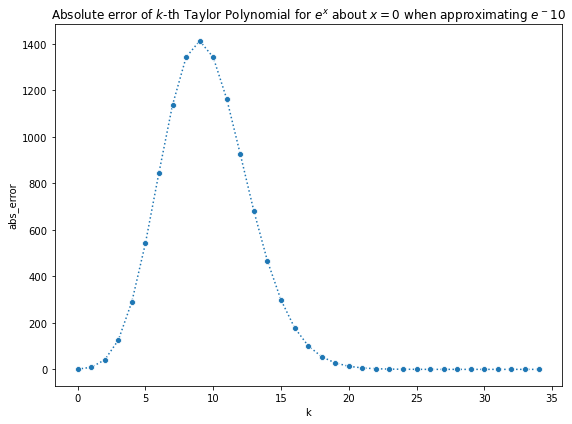

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
with sns.axes_style("whitegrid"):
    sns.lineplot(
        data=q02_output.reset_index(),
        x="k", 
        y="abs_error",
        marker="o",
        # dashes=False,
        linestyle=":",
        ax=ax
    )
ax.set_title(r"Absolute error of $k$-th Taylor Polynomial for $e^x$ about $x=0$ when approximating $e^-10$")
fig.tight_layout()
plt.savefig("images/computer_project_01/exercise02.png", dpi=300)
fig.show()

In [15]:
print(
    q02_output.to_latex(
        header=["$P_k(-10)$", "Absolute Error", "Relative Error"],
        na_rep="-",
        formatters={"fx": "{:0.10f}".format, "abs_error": "{:e}".format, "rel_error": "{:e}".format},
        escape=False,
        caption="Taylor approximation of degree $k$ of the function $e^x$ at $x=0$",
        label="tab:q02",
        position="!h"
    )
)

\begin{table}[!h]
\centering
\caption{Taylor approximation of degree $k$ of the function $e^x$ at $x=0$}
\label{tab:q02}
\begin{tabular}{lrrr}
\toprule
{} &       $P_k(-10)$ & Absolute Error & Relative Error \\
k  &                  &                &                \\
\midrule
0  &     1.0000000000 &   9.999546e-01 &   2.202547e+04 \\
1  &    -9.0000000000 &   9.000045e+00 &   1.982392e+05 \\
2  &    41.0000000000 &   4.099995e+01 &   9.030841e+05 \\
3  &  -125.6666666667 &   1.256667e+02 &   2.767994e+06 \\
4  &   291.0000000000 &   2.910000e+02 &   6.409701e+06 \\
5  &  -542.3333333333 &   5.423334e+02 &   1.194569e+07 \\
6  &   846.5555555556 &   8.465555e+02 &   1.864663e+07 \\
7  & -1137.5714285714 &   1.137571e+03 &   2.505668e+07 \\
8  &  1342.5873015873 &   1.342587e+03 &   2.957245e+07 \\
9  & -1413.1446208113 &   1.413145e+03 &   3.112658e+07 \\
10 &  1342.5873015873 &   1.342587e+03 &   2.957245e+07 \\
11 & -1162.6235369569 &   1.162624e+03 &   2.560849e+07 \\
12 &   925.05

### 2.b

### 2.c

## Question 3

### 3.a

In [16]:
def muller_method(f, x0, x1, x2, tol=1e-8, iterations=1000):
  """Muller Method Solver

  It finds a solution to f(x)=0 given an initial guess x0, x1 and x2

  Parameters
  ----------
  f : function
      Function to evaluate
  x0 : float, complex
      Initial guess
  x1 : float, complex
      Initial guess
  x2 : float, complex
      Initial guess
  tol : float, optional
      Tolerance, by default 1e-8
  iterations : int, optional
      Maximum number of iterations, by default 1000

  Returns
  -------
  float, complex
      Root
  """

  k = 3
  converge = False
  while not converge and (k < iterations + 2):
    fx0,fx1, fx2 = map(f, [x0, x1, x2])

    fx0x1 = (fx1 - fx0) / (x1 - x0)
    fx1x2 = (fx2 - fx1) / (x2 - x1)
    fx0x1x2 = (fx1x2 - fx0x1) / (x2 - x1)

    wk = fx1x2  + (x2 - x1) * fx0x1x2  # could be fx2x1x0 and fx2x1
    lk = fx2 / wk
    uk = fx0x1x2 / wk
    difference = 2 * lk / (1 + np.sqrt(1 - 4 * uk * lk))
    x = x2 - difference
    if np.abs(difference) < tol:
      converge = True
    else:
      x0 = x1
      x1 = x2
      x2 = x
      k += 1
  return x

In [17]:
def horner_method(coefs, x0, x1, x2, tol=1e-8, iterations=1000):
    """Horner Method Decomposition

    Parameters
    ----------
    coefs : list, np.array
        CoefficientsPolynomial coefficients, degrees are in decreasing order
    x0 : float, complex
        Initial guess
    x1 : float, complex
        Initial guess
    x2 : float, complex
        Initial Guess
    tol : float, optional
        Tolerance, by default 1e-8
    iterations : int, optional
        Maximum number of iterations finding each root, by default 1000
    
    Returns
    -------
    list
      List of roots
    """

    roots = []
    for _ in range(1, len(coefs)):
        f = np.poly1d(coefs)  # polynomial as a function
        z = muller_method(f, x0, x1, x2, tol, iterations)  # get one root from current polynomial
        roots.append(z)  # save roots

        # Horner
        n = len(coefs) - 1
        coefs_dict = dict(zip(range(n + 1), coefs[::-1]))
        b = {n: coefs[0]}
        for k in range(n - 1, -1, -1):
            b[k] = coefs_dict[k] + b[k + 1] * z
        
        coefs = [b[i] for i in range(max(b.keys()), 0, -1)]  # update polynomial

        #TODO: STEP 5!!!
    return roots

In [61]:
coefs_3a = [1, -16, 14, -224, 49, -784, 36, -576]
x0, x1, x2 = -1 + 0j, 0 + 0j, 1 + 0j
tol = 1e-15
iterations = 1000
horner_method(coefs_3a, x0, x1, x2, tol, iterations)

[(-1.4992462314780881e-18+1.0000000000000002j),
 (-2.3779735490438852e-17-1.0000000000000002j),
 (2.790773804205228e-17-2j),
 (-7.800021415709122e-17+2j),
 (8.463801450638368e-17+3j),
 (-1.1708566618374664e-16-3j),
 (16+0j)]

### 3.b

In [62]:
coefs_3b = [1.01, -16, 14, -224, 49, -784, 36, -576]
x0, x1, x2 = -1 + 0j, 0 + 0j, 1 + 0j
tol = 1e-15
iterations = 1000
horner_method(coefs_3b, x0, x1, x2, tol, iterations)

[(-1.2970002131514445e-05+0.9999991881236615j),
 (-1.2970002131489266e-05-0.9999991881236614j),
 (0.0013140682532852177-2.0001595227073206j),
 (0.0013140682532851475+2.000159522707321j),
 (-0.005497742584491073+2.998963122586297j),
 (-0.005497742584491312-2.998963122586298j),
 (15.849977447082512+4.3969228698026e-16j)]

In [65]:
(16 - 15.849977447082512)/16

0.00937640955734298